# Numerical integration
Python has libraries to perform numerical integration. You need a function, and a range to perform an integration.

First, include some modules

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integ


Define a function to integrate. It will have a single variable parameter. The integration will be performed on f(x)dx between limits.

In [2]:
# y=x
def f1(x):
    return x

use the scipy.integrate.quad function to perform a numerical integration. I'll start with a range from 0 to 1.0

In [3]:
integ.quad(f1,0,1)

(0.5, 5.551115123125783e-15)

The function returns two values, the first is the integration result. (0.5 in this case), and the second is an error estimate. A simple function was selected. as 1/2 the area of a square.  Try from 0 to 3

In [4]:
integ.quad(f1,0,3)

(4.5, 4.9960036108132044e-14)

It works, The first number is the integration result, and the second number is the error limit. 

now come up with a harder function...  A damped sin<sup>2</sup> wave
\begin{equation*}
sin(x)^2*e^{-0.05x}
\end{equation*}

In [5]:
def f2(x):
    return m.sin(x)**2*m.exp(-0.05*x)

Just for fun. plot it

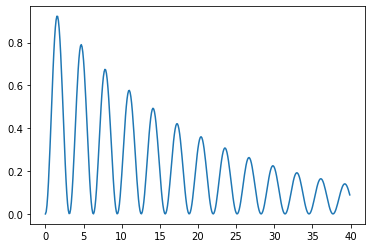

In [6]:
xv=[x/10 for x in range(400)]
yv=[f2(x) for x in xv]
plt.plot(xv,yv)

Compute the area from 0 to 40 

In [7]:
integ.quad(f2,0,40)

(8.673913806050264, 5.824911540386118e-12)

In [8]:
integ.quad(m.sin,0,m.pi*20)

(3.572506636764492e-15, 4.593642176875781e-13)

Pretty close to zero...

Now try the sin wave from 0 to pi/2... Should be 1.0

In [9]:
integ.quad(m.sin,0,m.pi/2)[0]

0.9999999999999999

That is pretty close to 1...

plot the integral of f2(x) from 0 to 0 to 40

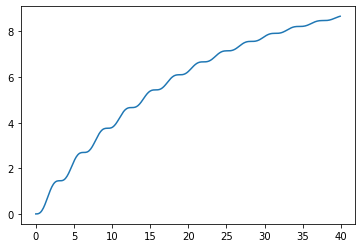

In [10]:
yi=[integ.quad(f2,0,x)[0] for x in xv]
plt.plot(xv,yi)

In [11]:
# integrate from 0 to +infinity
integ.quad(f2,0,m.inf,limit=1000)

(9.993753906699318, 1.4575121990202092e-07)

m.inf is +infinity.  limit=1000 allows for many partitions during the integration. The error of 1 part per million is good enough for most engineering applications.

Try an unbounded function like
\begin{equation*}
e^x
\end{equation*}

try in a limited range say 0 to 10 first

In [12]:
integ.quad(m.exp,0,10)

(22025.465794806725, 6.239389118119916e-10)

The integral of e<sup>x</sup> is pretty easy.  What happens to an integral that doesn't converge to zero at +infinity?

In [13]:
integ.quad(m.exp,0,m.inf)

OverflowError: math range error

It blew up...  Try -infinity to zero

In [14]:
integ.quad(m.exp,-m.inf,0)

(1.0000000000000002, 5.842606742906004e-11)

That feels about right... the integral of e<sup>x</sup> from -infinity to 0 is 1